In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import sys
import seaborn as sb
import math
from numpy import random
from scipy.signal import find_peaks
from scipy.optimize import minimize
from matplotlib.ticker import LinearLocator

sys.path.append(r'C:\Users\Joar\Documents\1_Education\NTNU\OneDrive - NTNU\Thesis\Modelling\FD Model')

In [2]:
from FloaterParameters import FloaterParameters
from Environment import Environment
from Buoy import Buoy
from Mass import Mass
from Density import Density
from Area import Area
from GeneralisedCoordinateSystem import GeneralisedCoordinateSystem
from SystemMatrices import MatrixCalculation
from ComputeHydroCoefficients import CompHydroCoefficient
from plot_hydroD_results import plot_hydroD_results
from ReadWadamLis import ReadWadamLis
from CheckInterpolation import InterpolateParameters
from jonswap import jonswap
from RAO_Calculation import calulate_RAOs
from kSolve import ksolve
from SpectrumStatistics import spectrum_response 
from InterpolateHydroDResults import InterpolateResults
from StaticThrustCheck import StaticThrustCheck
from OptimizationProblem import OptimizationProblem

Unable to import mpi4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.
Unable to import petsc4py. Parallel processing unavailable.


In [3]:
df = 1 / 3600
f = np.arange(0.01, 5, df)

In [4]:
floater = FloaterParameters(60,80,12)
env = Environment()
rho = Density()
csa = Area(floater)
buoy = Buoy(floater, csa, rho)
mass = Mass(floater, csa, buoy, rho)
coord = GeneralisedCoordinateSystem(floater, csa, mass, rho, buoy, env)
matrix = MatrixCalculation(coord, mass, floater, rho, env, csa, buoy)

In [5]:
file_loc = r'C:\Users\Joar\Documents\1_Education\NTNU\pickle_files'
file_name = "\sim_x_%d_y_%d_D%d" % (60,80,12)
file_path = file_loc + file_name
infile = open(file_path, 'rb')
results = (pickle.load(infile))
infile.close()

In [6]:
x_space = np.arange(20,100,5)
y_space = [70]
dia_column = [10,11,12]
deflection_1 = np.zeros(shape=(len(x_space), len(y_space), len(dia_column)))
Tz = np.zeros(shape=(len(x_space), len(y_space), len(dia_column)))
Significant_Amplitude = np.zeros(shape=(len(x_space), len(y_space), len(dia_column)))
N_mpm = np.zeros(shape=(len(x_space), len(y_space), len(dia_column)))
MPM = np.zeros(shape=(len(x_space), len(y_space), len(dia_column)))
response = np.zeros(shape=(len(x_space), len(y_space), len(dia_column), len(f)))
total_mass_1 = np.zeros(shape=(len(x_space), len(y_space), len(dia_column)))

In [7]:
x_space = [20,25,30,35,40,45,50,55,60,65,70]
y_space = [90]
dia_column = [10,11,12]


In [8]:
deflection = np.zeros(shape=(3,len(x_space)))
Tz = np.zeros(shape=(3, len(x_space), 3, 8))
Significant_Amplitude = np.zeros(shape=(3, len(x_space), 3, 8))
N_mpm = np.zeros(shape=(3, len(x_space), 3, 8))
MPM = np.zeros(shape=(3, len(x_space), 3, 8))
response = np.zeros(shape=(3, len(x_space), 3, len(f), 8))
total_mass = np.zeros(shape=(3,len(x_space)))

In [9]:
f_rated = 850e3

In [10]:
env = Environment()
rho = Density()

In [11]:
deflection = np.zeros(shape=(len(x_space),len(y_space),len(dia_column)))

In [12]:
for x, ii in enumerate(x_space):
    for y, jj in enumerate(y_space):
        for z, kk in enumerate(dia_column):
            floater = FloaterParameters(ii,jj,kk)
            csa = Area(floater)
            buoy = Buoy(floater, csa, rho)
            mass = Mass(floater, csa, buoy, rho)
            coord = GeneralisedCoordinateSystem(floater, csa, mass, rho, buoy, env)
            matrix = MatrixCalculation(coord, mass, floater, rho, env, csa, buoy)
            deflection[x,y,z] = ((floater.hub_height*f_rated*2)/matrix.stiffness[4,4])*(180/np.pi)
            print(matrix.stiffness[4,4])

-865422608.999125
-789161161.4823686
-703698662.110494
-747002438.6757456
-645872755.3910795
-533173616.8448277
-602266674.9471709
-470742481.27950406
-324754117.0756801
-431215317.81340075
-263770339.1476421
-78440162.803051
-233848367.27443498
-24956328.99549362
205768245.97305948
-10165823.330273861
245699549.17694128
527871109.2526515
239832314.01908275
548197295.3696629
887868427.0357248
516146044.77363455
882536909.5826702
1285760199.322279
818775368.9333817
1248718391.8159642
1721546426.1123154
1147720286.4983249
1646741742.069545
2195227107.405833
1502980797.4684627
2076606960.3434122
2706802243.202832


In [16]:
y_space = [90]
dia_column = [11]

In [17]:
for x, ii in enumerate(x_space):
    for y, jj in enumerate(y_space):
        for z, kk in enumerate(dia_column):
            _, _, _, MPM, _, _ = OptimizationProblem(ii, jj, kk)

In [18]:
((floater.hub_height*f_rated*2)/matrix.stiffness[4,4])*(180/np.pi)

3.0586793551064737

In [19]:
matrix.stiffness[4,4]

2706802243.202832

In [20]:
deflection

array([[[  -9.56670193,  -10.49119058,  -11.76532028]],

       [[ -11.08328395,  -12.81868614,  -15.52822547]],

       [[ -13.74680102,  -17.58762055,  -25.49387276]],

       [[ -19.1997821 ,  -31.38806344, -105.54848236]],

       [[ -35.40431022, -331.74911828,   40.23575212]],

       [[-814.41904612,   33.69660289,   15.68420774]],

       [[  34.52095341,   15.10266506,    9.32485027]],

       [[  16.04049905,    9.38118287,    6.43917905]],

       [[  10.11173571,    6.63018996,    4.80918784]],

       [[   7.21363928,    5.0276494 ,    3.77147317]],

       [[   5.50854685,    3.98690763,    3.05867936]]])

(0, 100)

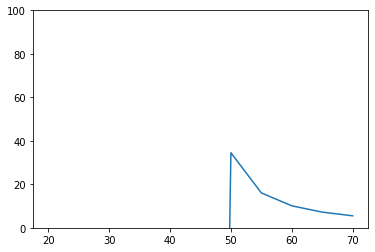

In [21]:
plt.plot(x_space,deflection[:,0,0])
plt.ylim(0,100)

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_space, deflection[x,:],'g', label="Pitch Deflection")
ax2.plot(x_space, total_mass[x,:],'b', label="Mass")
ax2.plot(x_call, weight,'*r',markersize=10, label="Optimization Evaluations")
ax1.axhline(y=10, color='m', linestyle='--', linewidth=2, label="Pitch Constraint")
ax1.axvline(x=x_call[-1], color='c', linestyle='--', linewidth=2, label="Optimization Solution")

ax1.set_xlabel('X Column Separation')
ax1.set_ylabel('Pitch Rotation [Deg]', color='g')
ax1.set_ylim([-15,15])
ax2.set_ylabel('Mass [kg]', color='b')
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

ax1.grid(b=True, which='both', axis='both')
ax1.legend(loc="lower right")
ax2.legend(loc='best')
fig.show()

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10, 10)
fig, axs = plt.subplots(1)
for x, ii in enumerate(dia_column):
    axs.plot(x_space, deflection[x,:], label = "Column Diameter = %d m"  %ii)
axs.set(ylabel='Pitch Rotation [deg]')
axs.set(xlabel='X-Axis Column Separation [m]')
axs.legend(loc="lower right")
axs.grid(b=True, which='both', axis='both')
axs.set(ylim=(-20,20))
axs.set(xlim=(20,95))

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (20, 10)
fig, axs = plt.subplots(1, 2)
for x, ii in enumerate(dia_column):
    axs[0].plot(x_space, deflection[x,:], label = "Column Diameter = %d m"  %ii)
    axs[1].plot(x_space, total_mass[x,:], label = "Column Diameter = %d m"  %ii)
axs[0].set(ylabel='Pitch Rotation [deg]')
axs[0].set(xlabel='X-Axis Column Separation [m]')
axs[0].legend(loc="lower right")
axs[0].grid(b=True, which='both', axis='both')
axs[0].set(ylim=(-20,20))
axs[0].set(xlim=(20,95))
axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs[1].legend(loc="lower right")
axs[1].set(ylim=(4e6,7e6))
axs[1].set(xlim=(20,95))
axs[1].grid(b=True, which='both', axis='both')
axs[1].set(ylabel = 'Total Weight [kg]')
axs[1].set(xlabel = 'X-Axis Column Separation [m]')

In [ ]:
plt.plot(x_space, total_mass[1,:])
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.grid(b=True, which='both', axis='both')
plt.ylabel('Total Weight [kg]')
plt.xlabel('X-Axis Column Separation [m]')

In [ ]:
def objective(x_space):
    _,_, _, _, _, _, mass = OptimizationProblem(x_space, 70, 12)
    print(mass)
    return mass
def constraint1(x_space):
    pitch,_, _, _, _, _, _ = OptimizationProblem(x_space, 70, 12)
    #print(- pitch + 10)
    return - pitch + 10
con1 = [{'type':'ineq', 'fun':constraint1}]
x0 = 60.0
sol = minimize(objective,x0,method='SLSQP', constraints=cons)